# MA4M4: Lab Class

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import betterspy

## 1. Preliminaries

### Graph 1

- **Import the network data**

In [11]:
fh = open("out.brunson_southern-women_southern-women", "rb")
G = nx.read_edgelist(fh, comments='%',create_using=nx.Graph())   
fh.close()

- **Visualize the network**

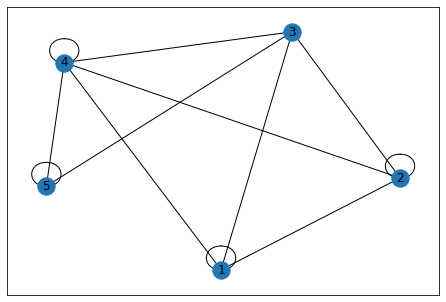

In [12]:
nx.draw(G, pos = nx.spring_layout(G, k=5), with_labels=True) # Take times for large network
plt.axis("on");

- **Adjacency Matrix**

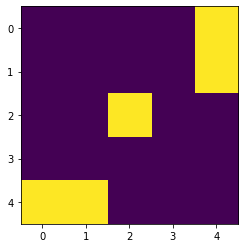

In [13]:
adj = nx.adjacency_matrix(G)
betterspy.show(adj)

### Graph 2

- **Import the network data**

In [14]:
fh = open("out.brunson_south-africa_south-africa", "rb")
G = nx.read_edgelist(fh, comments='%',create_using=nx.Graph())   
fh.close()

- **Visualize the network**

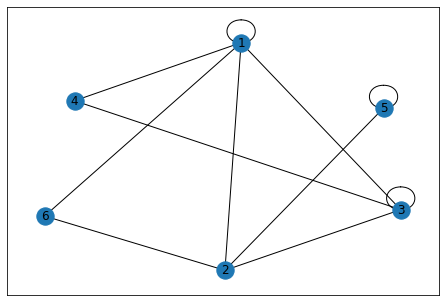

In [15]:
nx.draw(G, pos = nx.spring_layout(G, k=5), with_labels=True) # Take times for large network
plt.axis("on");

- **Adjacency Matrix**

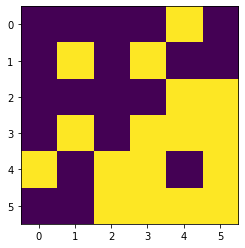

In [16]:
adj = nx.adjacency_matrix(G)
betterspy.show(adj)

## 2. Basic structural properties of networks

From now on, we work on Graph 2

### 2a. Focus on one of the above empirical networks. Compute the degree distribution and visualize its histogram. What is the mean and variance of the degrees?

- Degree Distribution

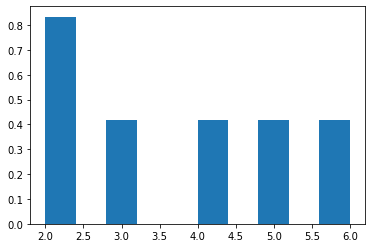

In [17]:
degree= np.array([b for x,b in nx.degree(G)])
pk = degree/np.sum(degree)
plt.hist(degree,density=True);

- Mean and Variance of the Degrees

In [20]:
mean_degree = np.mean(degree)
print("Mean Degree is", mean_degree)

var_degree = np.var(degree)
print("Variance of Degree is", var_degree)

Mean Degree is 3.6666666666666665
Variance of Degree is 2.2222222222222223


### 2b. Compute the local clustering coefficient, closeness centrality, and betweenness centrality of nodes in the network. Measure the correlation between degrees, betweenness, and closeness centrality. The correlation can either be estimated with the centrality values (Pearson) or with their associated ranking (Kendall’s tau or Spearman’s rho).

- Local Clustering Coefficient

In [23]:
cc = nx.clustering(G)
print(cc)

{'1': 0.5, '2': 0.3333333333333333, '3': 0.6666666666666666, '4': 1.0, '5': 0, '6': 1.0}


- Closeness Centrality

In [40]:
closeness = nx.closeness_centrality(G)
closeness = np.array(tuple(dict.values(closeness)))
print(closeness)

[0.83333333 0.83333333 0.71428571 0.55555556 0.5        0.625     ]


- Betweenness Centrality

In [41]:
betweenness = nx.betweenness_centrality(G)
betweenness = np.array(tuple(dict.values(betweenness)) )
print(betweenness)

[0.25 0.45 0.1  0.   0.   0.  ]


- Correlation

In [47]:
degree = np.array([b for x,b in nx.degree(G)])
r1 = np.corrcoef(degree, betweenness)
r2 = np.corrcoef(degree, closeness)
r3 = np.corrcoef(closeness, betweenness)

In [49]:
print("Between degrees and betweeness: ")
print(r1)
print("Between degrees and closeness: ")
print(r2)
print("Between betweenness and closeness: ")
print(r3)

Between degrees and betweeness: 
[[1.         0.57849241]
 [0.57849241 1.        ]]
Between degrees and closeness: 
[[1.         0.76023819]
 [0.76023819 1.        ]]
Between betweenness and closeness: 
[[1.         0.87686944]
 [0.87686944 1.        ]]


### 2c. Create two visualizations for the empirical networks (i) nodes are colored based on degree and (ii) nodes are colored based on betweenness centrality.